<a href="https://colab.research.google.com/github/PrathmeshPawarb/Data-Science-Machine-Learning-Assignments/blob/main/PCA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [ ]:
wine = df.copy()

In [ ]:
df['Type'].unique()

array([1, 2, 3])

In [ ]:
df = df.iloc[:,1:]
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
df = sc.fit_transform(df)
df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [ ]:
# importing PCA (3 components)

from sklearn.decomposition import PCA
pc = PCA(n_components=3)

In [ ]:
pcomponents = pd.DataFrame(pc.fit_transform(df), columns=['a','b','c'])
pcomponents

,a,b,c
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [ ]:
var = pc.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631])

In [ ]:
#cumulative varience
var1 = np.cumsum(var*100)
var1

array([36.1988481 , 55.40633836, 66.52996889])

# Hierarchical Clustering

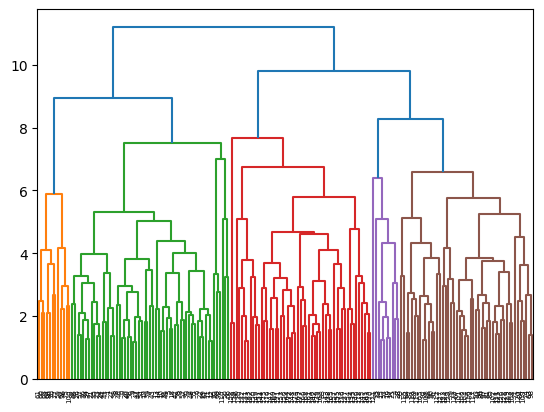

In [ ]:
# dendrogram

import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(df, method= "complete"))
plt.show()

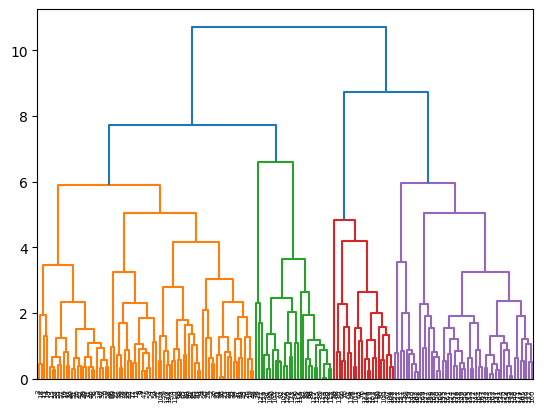

In [ ]:
# after PCA

import scipy.cluster.hierarchy as sch
sch.dendrogram(sch.linkage(pcomponents, method= "complete"))
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="complete")

In [ ]:
#fitting the data
hc.fit(pcomponents)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [ ]:
#cluster distribution (prediction)

yhc = hc.fit_predict(pcomponents)

yhc= pd.DataFrame(yhc)
yhc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,0
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [ ]:
#compairing clusters with wine type
Cluster = pd.DataFrame(wine['Type'])

Cluster['hrcluster']=yhc
Cluster

,Type,hrcluster
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1


#Kmeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]

for i in range(1,10):
  k= KMeans(n_clusters = i)
  k.fit(pcomponents.iloc[:,1:-1])                   #(for all row and colums from 1 to 2nd last)
  wcss.append(k.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
wcss

[444.461324547187,
 110.10556343653545,
 53.9429424868045,
 32.692966619521,
 21.581631353409833,
 16.585852624380692,
 12.31893411261734,
 9.366806315894538,
 7.359790537799273]

Text(0, 0.5, 'wcss inertia')

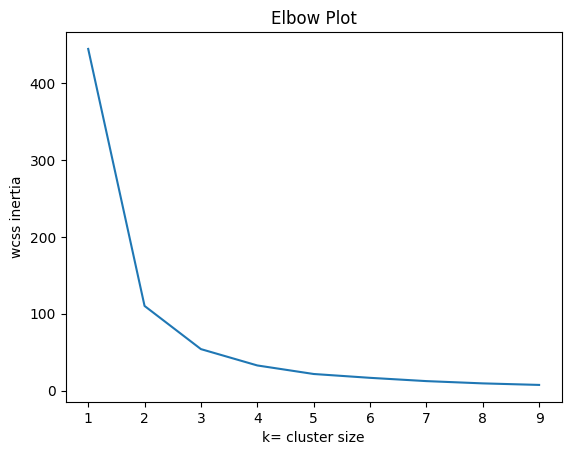

In [ ]:
sns.lineplot(x=range(1,10),y=wcss)
plt.title('Elbow Plot')
plt.xlabel('k= cluster size')
plt.ylabel('wcss inertia')

In [ ]:
# choosing the cluster size 3 (after k=3 graph is gradual)
km = KMeans(n_clusters=3)

# fitting k=5 in model
kcluster=km.fit_predict(pcomponents.iloc[:,:])
kcluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
#compairing clusters with wine type


Cluster['kcluster']= kcluster
Cluster

,Type,hrcluster,kcluster
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
173,3,1,1
174,3,1,1
175,3,1,1
176,3,1,1


#DBSCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors

# n_neighbors=2*dimentions(3)
nn=NearestNeighbors(n_neighbors=6)

nbrs=nn.fit(pcomponents)

In [ ]:
dist,indices= nbrs.kneighbors(pcomponents)
dist

array([[0.        , 0.33545332, 0.35896077, 0.40593636, 0.43631251,
        0.66128082],
       [0.        , 1.02503545, 1.07220843, 1.12432948, 1.19043181,
        1.31235805],
       [0.        , 0.45476287, 0.55792947, 0.62770831, 0.81873341,
        0.88043841],
       ...,
       [0.        , 0.60593631, 0.62783588, 0.67212366, 0.87486329,
        0.87661868],
       [0.        , 0.38326546, 0.39035495, 0.5757452 , 0.57936118,
        0.66704337],
       [0.        , 0.93867743, 1.00918166, 1.1361449 , 1.26333429,
        1.42894994]])

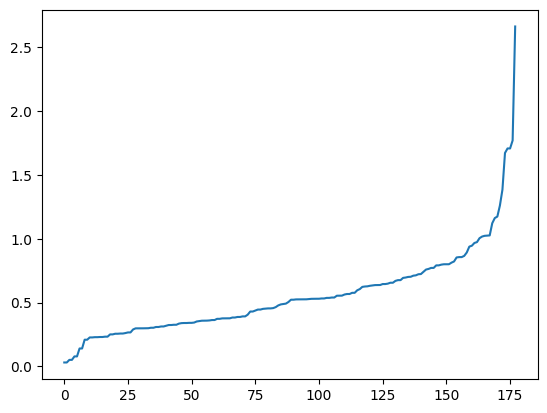

In [ ]:
#sorting
dist = np.sort(dist,axis=0)
dist= dist[:,1]
plt.plot(dist)  # eps value lies around 1

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.95, min_samples=4)

clf= db.fit_predict(pcomponents)
clf


array([ 0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  1, -1,  0,  0,  0, -1,  0,
       -1,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  1,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1])

In [ ]:
#compairing clusters with wine type


Cluster['dbscan']= clf
Cluster

,Type,hrcluster,kcluster,dbscan
0,1,0,0,0
1,1,0,0,-1
2,1,0,0,0
3,1,0,0,0
4,1,0,0,-1
...,...,...,...,...
173,3,1,1,1
174,3,1,1,1
175,3,1,1,1
176,3,1,1,1


Conclusion- in this set Hierarchical Clustering and k means clustering both shows most accurate results

In [ ]:
# final 2D data

final = Cluster.iloc[:,0]
final=pd.DataFrame(final)

final[['a','b']]= pcomponents[['a','b']]

final

,Type,a,b
0,1,3.316751,-1.443463
1,1,2.209465,0.333393
2,1,2.516740,-1.031151
3,1,3.757066,-2.756372
4,1,1.008908,-0.869831
...,...,...,...
173,3,-3.370524,-2.216289
174,3,-2.601956,-1.757229
175,3,-2.677839,-2.760899
176,3,-2.387017,-2.297347


<Axes: xlabel='a', ylabel='b'>

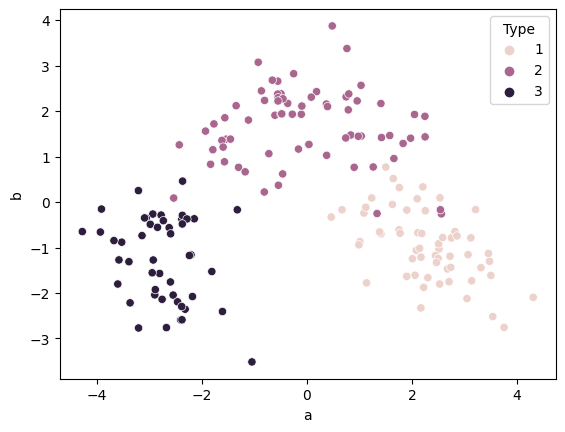

In [ ]:
sns.scatterplot(x='a',y='b',hue='Type',data=final)